## Comparação Entre Modelos

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import rcParams
from statsmodels.tools.eval_measures import rmse
import warnings
from shutil import copy2
%matplotlib inline

# Matplotlib options
rcParams['figure.figsize'] = (10, 8)
rcParams['axes.grid'] = False
plt.style.use('seaborn-deep')

# Pandas setup
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000) 
pd.set_option('display.max_colwidth', -1) 

warnings.filterwarnings('ignore')

In [2]:
def get_stored_predictions():
    """
    Get notebook stored forecast for ARIMA, Prophet, and ETS
    """
    %store -r arima
    %store -r prophet
    %store -r ets
    %store -r true_values
    %store -r name

    ets.index = arima.index
    
    if (arima.name == prophet.name) & (arima.name == ets.name) & (arima.name == true_values.name): 
        print("Returning", arima.name, "outcome", sep=" ")
    else:
        raise ValueError(
            f"Different time series comparison:\n"
            f"Expected: {prophet.name}\n" 
            f"Got: {ets.name} | {true_values.name}"
        )

In [3]:
get_stored_predictions()

Returning FÓSFORO outcome


In [4]:
score = pd.DataFrame({
    "RMSE": [
        rmse(arima, true_values),
        rmse(ets, true_values),
        rmse(prophet, true_values)
    ]
}, index=["arima", "ets", "prophet"])
score.sort_values("RMSE")

,RMSE
ets,1.575766
arima,2.002959
prophet,2.604419


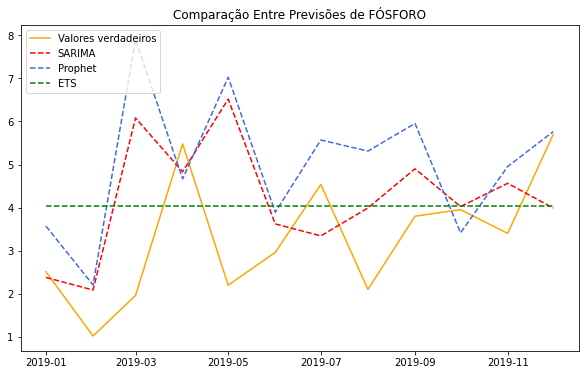

In [5]:
col = arima.name

plt.figure(figsize=(10, 6))
plt.plot(true_values, color="orange", label="Valores verdadeiros")
plt.plot(arima, color="red", linestyle="--", label="SARIMA")
plt.plot(prophet, color="royalblue", linestyle="--", label="Prophet")
plt.plot(ets, color="green", linestyle="--", label="ETS")
plt.title(f"Comparação Entre Previsões de {col}")
plt.legend(loc="upper left");

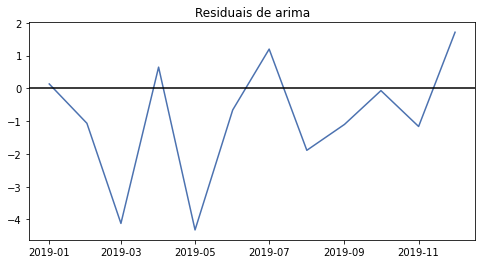

In [6]:
best_fit_name = score.index[0]
residuals = true_values - eval(best_fit_name)
plt.figure(figsize=(8, 4))
plt.plot(residuals)
plt.axhline(0, color="black")
plt.title(f"Residuais de {best_fit_name}");

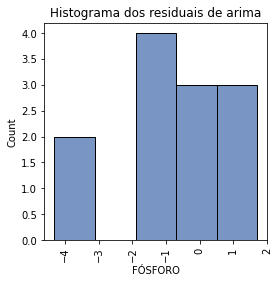

In [7]:
plt.figure(figsize=(4, 4))
plt.xticks(rotation=90)
plt.xlabel("")
plt.title(f"Histograma dos residuais de {best_fit_name}")
sns.histplot(residuals);

In [8]:
copy2("model_wrapper.ipynb", f"./comparison/{name}_{col}.ipynb")

&#39;./comparison/p1_FÓSFORO.ipynb&#39;